### Working with larger example (Multi class Classification)

In [ ]:
# Imports

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [ ]:
print(f"Training sample: \n{train_data[0]}\n")
print(f"Testing Sample: \n{train_labels[0]}\n")

Labels

Each training and test example is assigned to one of the following labels:

+ 0 T-shirt/top
+ 1 Trouser
+ 2 Pullover
+ 3 Dress
+ 4 Coat
+ 5 Sandal
+ 6 Shirt
+ 7 Sneaker
+ 8 Bag
+ 9 Ankle boot

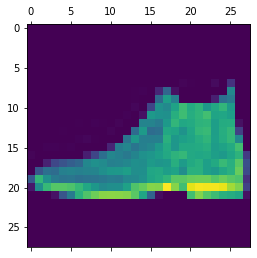

In [13]:
plt.matshow(test_data[0]);

In [15]:
train_labels[0] # Ankle Boot

9

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker','Bag','Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

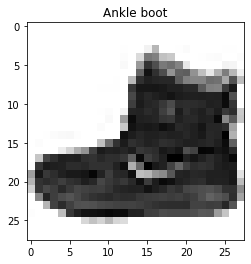

In [28]:
index :int = 0
plt.imshow(train_data[index],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

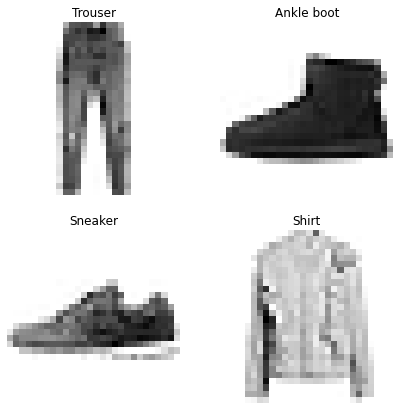

In [34]:
# Plot multiple random images
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_inx = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_inx], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_inx]])
    plt.axis(False)


### Building a multi-class classification model

Most of the thing is same as Binary classification, but we need to tweak some parameters.

+ **Input Shape** : 28*28 (shape of one image)
+ **Output Shape** : 10 (as we have 10 class)
+ **Loss Function** : CategoricalCrossentropy()
    + If labels are one hot encodeed use CategoricalCrossentropy else use Sparse categorical entropy
+ **Output layer activatio** : Softmax

In [36]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

# Our data needs to be falttend from (28,28) to (None, 784)

(None, 784)

In [38]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

no_norm_history = model.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data,test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9724 - accuracy: 0.1783 - val_loss: 1.7654 - val_accuracy: 0.2154
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7242 - accuracy: 0.2546 - val_loss: 1.6943 - val_accuracy: 0.2689
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6774 - accuracy: 0.2828 - val_loss: 1.6664 - val_accuracy: 0.2890
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6541 - accuracy: 0.2952 - val_loss: 1.6453 - val_accuracy: 0.3014
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6406 - accuracy: 0.3021 - val_loss: 1.6325 - val_accuracy: 0.3136
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6295 - accuracy: 0.3071 - val_loss: 1.6219 - val_accuracy: 0.3168
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6181 - accuracy: 0.3141 - val_loss: 1.6094 - val_accuracy:

In [40]:
# Check model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Check min and max of the training data
train_data.min(), train_data.max()

(0, 255)

Neural network prefer data to be scaled or normalized, this means they like to have the numbers in the terms between 0 and 1

In [45]:
train_data_norm = train_data/255.0
test_data_norm  =test_data/255.0


test_data_norm.max(), train_data.min()

(1.0, 0)

In [46]:
# Modelling

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

norm_history = model_2.fit(
    train_data_norm,
    train_labels,
    epochs=10,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0250 - accuracy: 0.6306 - val_loss: 0.7722 - val_accuracy: 0.7409
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7351 - accuracy: 0.7489 - val_loss: 0.7387 - val_accuracy: 0.7365
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6933 - accuracy: 0.7626 - val_loss: 0.6932 - val_accuracy: 0.7625
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6654 - accuracy: 0.7723 - val_loss: 0.6745 - val_accuracy: 0.7750
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6459 - accuracy: 0.7788 - val_loss: 0.6657 - val_accuracy: 0.7721
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6288 - accuracy: 0.7833 - val_loss: 0.6504 - val_accuracy: 0.7810
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6193 - accuracy: 0.7866 - val_loss: 0.6526 - val_accuracy:

<AxesSubplot:title={'center':'Normalized Data'}>

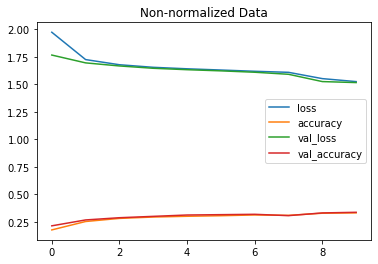

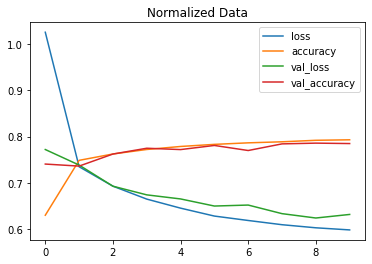

In [47]:
# Plotting non-normalized data loss curves
pd.DataFrame(no_norm_history.history).plot(title="Non-normalized Data")

# Plotting normalized data loss curve
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

**Note** : The same model with even slightly different data can produce dynamically different results. It is important to compare them on same criteria.

In [48]:
tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Create learning rate callback
lr_sheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs:1e-3*10**(epochs/20))

find_lr_history = model_3.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_sheduler]
)

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1659 - accuracy: 0.5839 - val_loss: 0.8737 - val_accuracy: 0.6746 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7749 - accuracy: 0.7085 - val_loss: 0.7536 - val_accuracy: 0.7106 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6899 - accuracy: 0.7405 - val_loss: 0.7119 - val_accuracy: 0.7394 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6529 - accuracy: 0.7558 - val_loss: 0.6796 - val_accuracy: 0.7500 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6335 - accuracy: 0.7643 - val_loss: 0.6595 - val_accuracy: 0.7515 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6213 - accuracy: 0.7701 - val_loss: 0.7144 - val_accuracy: 0.7400 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

<AxesSubplot:title={'center':'Learning'}>

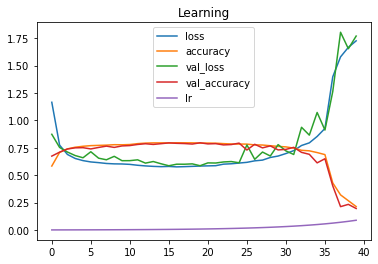

In [50]:
pd.DataFrame(find_lr_history.history).plot(title='Learning')

Text(0.5, 1.0, 'Finding the ideal learning rate')

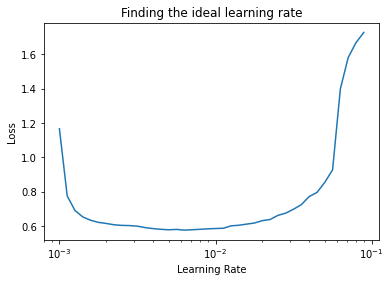

In [51]:
lrs = 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [52]:
# LEt's refit the model with ideal learning rate

tf.random.set_seed(42)


model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history_4 = model_4.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0078 - accuracy: 0.6326 - val_loss: 0.7089 - val_accuracy: 0.7416
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6596 - accuracy: 0.7609 - val_loss: 0.6553 - val_accuracy: 0.7651
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6216 - accuracy: 0.7772 - val_loss: 0.6299 - val_accuracy: 0.7782
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5999 - accuracy: 0.7879 - val_loss: 0.6148 - val_accuracy: 0.7839
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5890 - accuracy: 0.7927 - val_loss: 0.6092 - val_accuracy: 0.7863
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5781 - accuracy: 0.7978 - val_loss: 0.6188 - val_accuracy: 0.7873
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5726 - accuracy: 0.8012 - val_loss: 0.6203 - val_accuracy:

<AxesSubplot:>

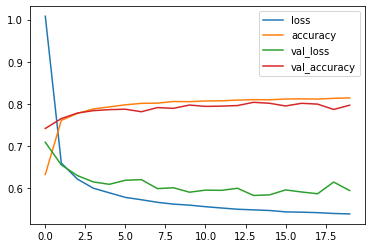

In [53]:
pd.DataFrame(history_4.history).plot()

In [59]:
# Predictions

y_probs = model_4.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[3.7890445e-06, 1.1404904e-09, 4.9401745e-09, 1.3004212e-08,
        7.4529098e-08, 7.6869555e-02, 4.5388620e-07, 8.7033346e-02,
        1.8412316e-03, 8.3425158e-01],
       [6.9147703e-05, 1.5784282e-07, 7.9847389e-01, 3.4583936e-10,
        1.4144443e-01, 1.1081461e-34, 5.9899334e-02, 4.6213955e-28,
        1.1293990e-04, 1.1563693e-23],
       [2.8489554e-05, 9.9900466e-01, 2.1791214e-04, 4.9440758e-15,
        2.1932003e-08, 1.1503474e-30, 1.1221044e-07, 2.7797064e-17,
        7.4887415e-04, 2.4458060e-30],
       [6.4801126e-05, 9.9876034e-01, 3.1707980e-04, 4.9281088e-14,
        5.0015789e-08, 7.0287722e-29, 3.0272432e-07, 1.7724718e-16,
        8.5745269e-04, 5.9660146e-29],
       [4.4420388e-02, 1.5618013e-04, 1.4131489e-01, 3.9321762e-02,
        1.5962693e-01, 4.4399699e-11, 6.1313683e-01, 1.0680791e-11,
        2.0230138e-03, 1.4690882e-09]], dtype=float32)

### Evaluate multi-class classification model

To evaluate our multi class classification model, we could:
+ Evaluate its performance using other classification metrics(Confusion matrix)
+ Asses some of it's predictions
+ Improve the result (by training for longer or changing architecture)
+ Save and export it for use in other application 

In [71]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
import itertools


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 20), text_size=15):

    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # Let's pretiffy
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)


    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axis

    ax.set(
        title='Confusion Matrix',
        xlabel="Predicated Label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
    )

    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max()+cm.min())/2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)", horizontalalignment="center", color="white" if cm[i, j] > threshold else "black", size=15
                 )


In [72]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([3.7890445e-06, 1.1404904e-09, 4.9401745e-09, 1.3004212e-08,
        7.4529098e-08, 7.6869555e-02, 4.5388620e-07, 8.7033346e-02,
        1.8412316e-03, 8.3425158e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [73]:
# Convert all preditions probabilities

y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

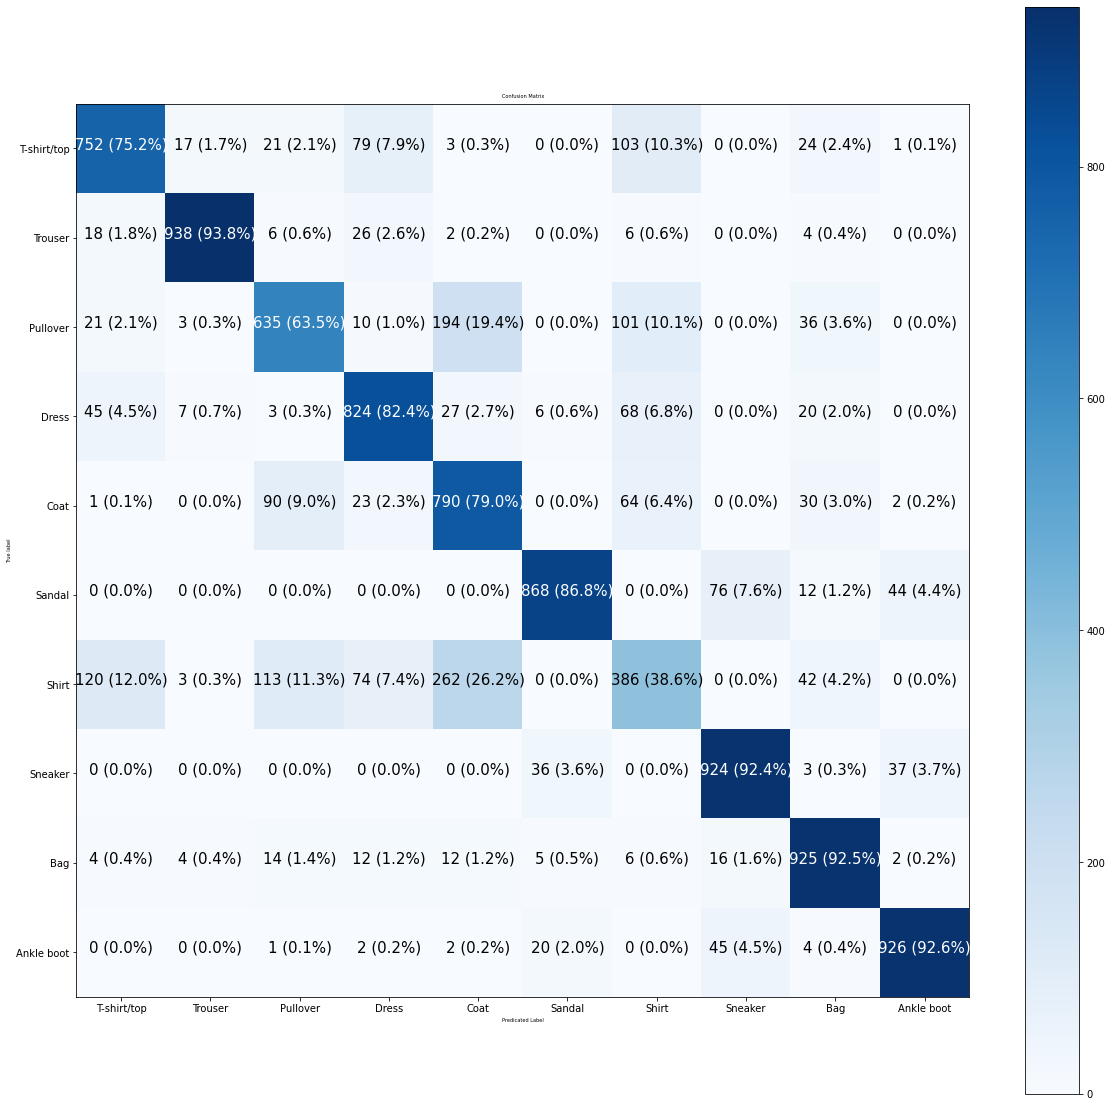

In [79]:
make_confusion_matrix(y_true=test_labels,y_pred=y_preds,classes=class_names, figsize=(20,20), text_size=5)

Often working with image and other froms of visual data, it is a good idea to visualize as much as possible to develop a furthur understanding of the data and the inputs and outputs of model


+ Create a function to 
+ plot random image
+ make prediction on  image

In [80]:
import random

def plot_random_image(model,images, true_labels, classes):
    # Pick a random image 
    i = random.randint(0,len(images))

    target = images[i]
    pred_probs = model.predict(target.reshape(1,28,28))
    pred_labesl = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    plt.imshow(target, cmap=plt.cm.binary)

    if pred_labesl == true_label:
        color = "green"
    else:
        color= "red"

    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_labesl, 100*tf.reduce_max(pred_probs), true_label), color=color)


1/1 [==============================] - 0s 23ms/step


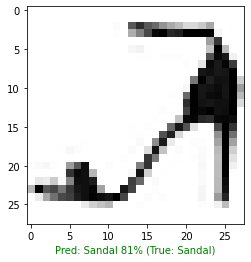

In [97]:
plot_random_image(model=model_4, images=test_data_norm, true_labels=test_labels,classes=class_names)

## What patterns is our model learning.



In [100]:
model_4.layers

In [101]:
# Extract particular layer
model_4.layers[1]

In [102]:
# Get the patterns of the layers in our network
weights, biases = model_4.layers[1].get_weights()

weights, weights.shape

(array([[ 0.12520961,  0.8813974 , -1.0174919 , -0.11555414],
        [ 0.10590484, -0.99846727, -0.45509946,  0.4193517 ],
        [-0.5422284 ,  0.35926187, -0.95375067, -0.52730787],
        ...,
        [ 0.7421445 , -0.24668548, -0.264612  ,  0.15872224],
        [-0.5892477 ,  0.3942537 , -0.22826278,  0.36387065],
        [ 0.28660312,  1.063227  , -0.1544012 , -0.67292833]],
       dtype=float32),
 (784, 4))

In [104]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [105]:
# Biases

biases, biases.shape

(array([ 0.21510345,  0.02400835, -0.09180362,  0.3118852 ], dtype=float32),
 (4,))

In [109]:
from tensorflow.keras.utils import plot_model

plot_model(model=model_4, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
